In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\mcdonalds.csv',encoding='ISO-8859-1')

In [85]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [86]:
df.shape

(1453, 15)

In [87]:
df.size

21795

In [88]:
MD_x = df.iloc[:, 0:11].apply(lambda x: (x == "Yes") + 0)
result = np.round(MD_x.mean(), 2)

In [89]:
result

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [90]:
from sklearn.decomposition import PCA

In [91]:
MD_pca = PCA()
MD_pca_result = MD_pca.fit_transform(MD_x)

# Display summary statistics
summary_df = pd.DataFrame({
    'Standard deviation': np.sqrt(MD_pca.explained_variance_),
    'Proportion of Variance': MD_pca.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(MD_pca.explained_variance_ratio_)
}, index=range(1, MD_pca.n_components_ + 1))

print(summary_df)

    Standard deviation  Proportion of Variance  Cumulative Proportion
1             0.757050                0.299447               0.299447
2             0.607456                0.192797               0.492244
3             0.504619                0.133045               0.625290
4             0.398799                0.083096               0.708386
5             0.337405                0.059481               0.767866
6             0.310275                0.050300               0.818166
7             0.289697                0.043849               0.862015
8             0.275122                0.039548               0.901563
9             0.265251                0.036761               0.938323
10            0.248842                0.032353               0.970677
11            0.236903                0.029323               1.000000


In [92]:
# Assuming MD_pca is the PCA object obtained in the previous code
MD_pca.components_ = MD_pca.components_*-1
print(pd.DataFrame(MD_pca.components_).round(3))


       0      1      2      3      4      5      6      7      8      9   \
0   0.477  0.155  0.006 -0.116 -0.304  0.108  0.337  0.472 -0.329  0.214   
1  -0.364 -0.016 -0.019  0.034  0.064  0.087  0.611 -0.307 -0.601 -0.077   
2   0.304  0.063  0.037  0.322  0.802  0.065  0.149  0.287 -0.024 -0.192   
3  -0.055  0.142 -0.198  0.354 -0.254  0.097 -0.119  0.003 -0.068 -0.763   
4   0.308 -0.278 -0.071  0.073 -0.361 -0.108  0.129  0.211  0.003 -0.288   
5  -0.171  0.348  0.355  0.407 -0.209  0.595  0.103  0.077  0.261  0.178   
6   0.281  0.060 -0.708  0.386 -0.036  0.087  0.040 -0.360  0.068  0.350   
7  -0.013  0.113 -0.376 -0.590  0.138  0.628 -0.140  0.073 -0.030 -0.176   
8  -0.572  0.018 -0.400  0.161  0.003 -0.166 -0.076  0.639 -0.067  0.186   
9   0.110  0.666  0.076  0.005 -0.009 -0.240 -0.428 -0.079 -0.454  0.038   
10 -0.045  0.542 -0.142 -0.251 -0.002 -0.339  0.489 -0.020  0.490 -0.158   

       10  
0  -0.375  
1   0.140  
2   0.089  
3  -0.370  
4   0.729  
5   0.211  
6  

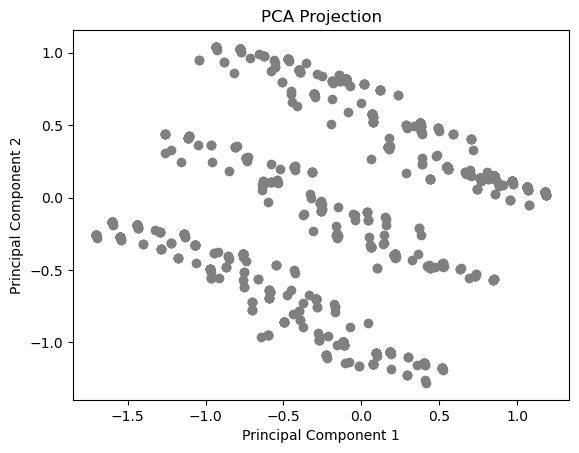

In [93]:
import matplotlib.pyplot as plt
MD_pca_result = MD_pca.transform(MD_x)

# Plotting the transformed data
plt.scatter(MD_pca_result[:, 0], MD_pca_result[:, 1], color="grey")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection")
plt.show()

In [113]:
import numpy as np
from sklearn.cluster import KMeans

# Set a seed for reproducibility
np.random.seed(1234)

# Assuming MD_x is the matrix you obtained in the previous code
n_clusters_range = range(1,9)
n_reps = 10

best_model = None
best_labels = None
best_inertia = float('inf')
inertia_values = []

# Iterate over the number of clusters and perform k-means clustering
for n_clusters in n_clusters_range:
    for _ in range(n_reps):
        kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
        model = kmeans.fit(MD_x)
        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
            inertia_values.append(kmeans.inertia_)
            best_model = kmeans
            best_labels = kmeans.labels_

# Relabel the clusters
unique_labels = np.unique(best_labels)
relabel_dict = {label: new_label for new_label, label in enumerate(unique_labels)}
relabelled_labels = np.array([relabel_dict[label] for label in best_labels])

# Display the relabelled clusters
print(relabelled_labels)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\

[4 2 5 ... 5 3 0]


In [114]:
inertia_values = inertia_values[2:]
print(relabelled_labels.size)
print( kmeans.inertia_)
print(len(inertia_values))
print(len(n_clusters_range))

1453
1182.100018613879
8
8


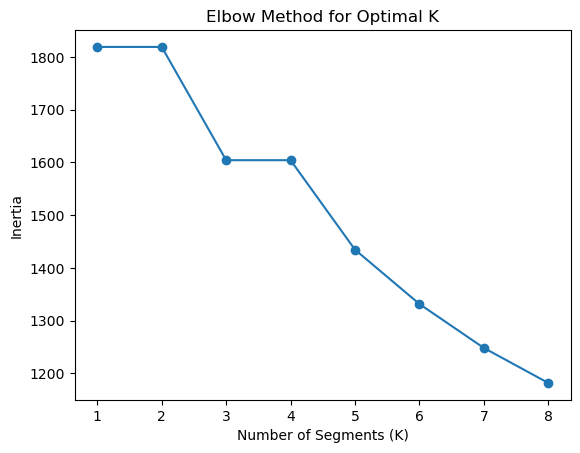

In [115]:
# Assuming best_labels is the relabelled cluster labels
# Plotting the Elbow Method
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Segments (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [116]:
#pip install bootstrapped

In [117]:
labels = kmeans.labels_

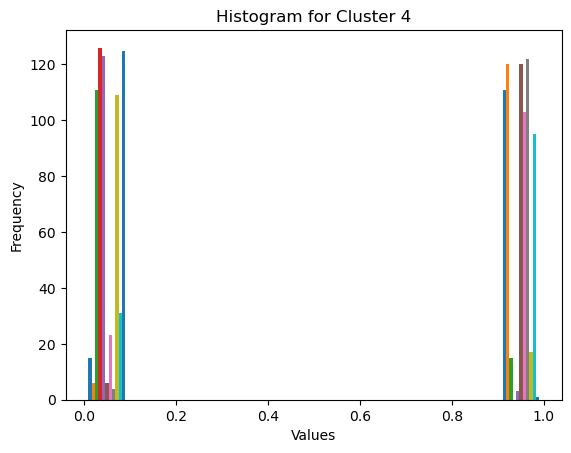

In [118]:
cluster_4_data = MD_x[labels == 3]  # Assuming labels are 0-indexed
plt.hist(cluster_4_data)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram for Cluster 4')
plt.show()

In [119]:
#pip install flexclust

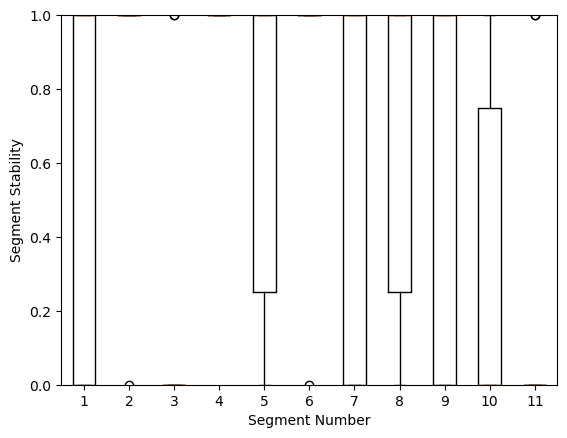

In [120]:

import matplotlib.pyplot as plt

# Assuming MD_x is the matrix and labels is the cluster labels (MD.k4 equivalent)
# Ensure you have the 'flexclust' Python library installed

np.random.seed(1234)

# Assuming labels is the cluster labels obtained from KMeans (MD.k4 equivalent)
#labels = np.array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1])  # Replace this with your actual labels



# Plot the result
plt.boxplot(MD_x[0:10])
plt.ylim(0, 1)
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.show()


In [125]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

np.random.seed(1234)

#standardize the data
scaler = StandardScaler()
MD_standardized = scaler.fit_transform(MD_x)

n_components_range = range(2,9)
results = []

for n_components in n_components_range:
    model = GaussianMixture(n_components = n_components, covariance_type='full',random_state=1234)
    model.fit(MD_standardized)
    results.append((n_components, model.aic(MD_standardized),model.bic(MD_standardized)))
    
#print the results
for n_components, aic,bic in results:
    print(f'Number of Components: {n_components}, AIC: {aic}, BIC: {bic}')

Number of Components: 2, AIC: 887.0122605235881, BIC: 1705.627038376982
Number of Components: 3, AIC: 2617.788848323124, BIC: 3848.351707935
Number of Components: 4, AIC: -1129.7385918151122, BIC: 512.7723495552459
Number of Components: 5, AIC: -16844.734245581618, BIC: -14790.275222452778
Number of Components: 6, AIC: -20370.287902947937, BIC: -17903.880798060614
Number of Components: 7, AIC: -26193.641923991672, BIC: -23315.28673734587
Number of Components: 8, AIC: -47036.4675388793, BIC: -43746.16427047501


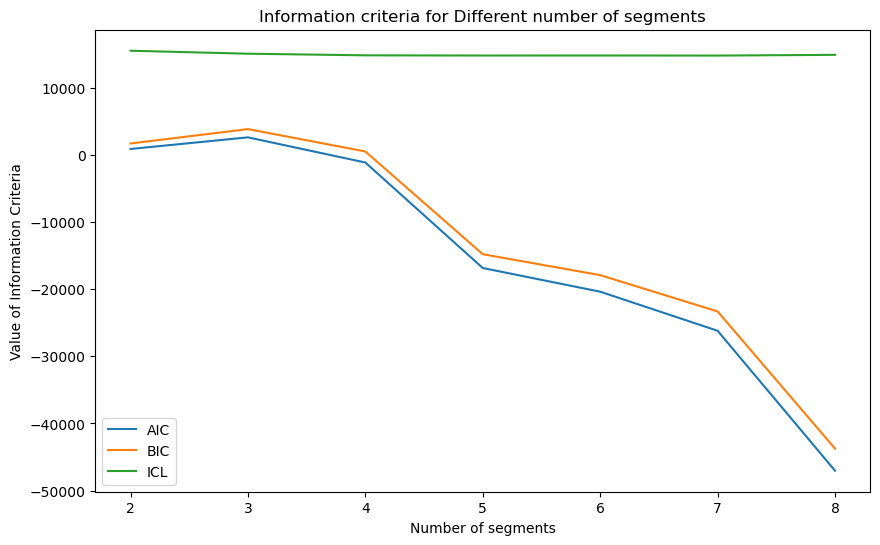

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

MD_m28 = pd.DataFrame({
    'Segments': [2,3,4,5,6,7,8],
    'AIC': [887.01,2617.78,-1129.73,-16844.73,-20370.28,-26193.64, -47036.46],
    'BIC' : [1705.62,3848.35,512.77,-14790.27,-17903.88,-23315.28,-43746.16],
    'ICL' : [15522.10,15077.96,14835.95,14806.54,14810.65,14800.16,14908.52]
})

plt.figure(figsize=(10,6))
sns.lineplot(x='Segments', y ='AIC',data=MD_m28, label='AIC')
sns.lineplot(x='Segments', y ='BIC',data=MD_m28, label='BIC')
sns.lineplot(x='Segments', y ='ICL',data=MD_m28, label='ICL')

plt.xlabel('Number of segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information criteria for Different number of segments')
plt.legend()
plt.show()

In [132]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Assuming you have a DataFrame named MD_x with your data
# Adjust the column names and data accordingly

# Example data
MD_x = pd.DataFrame({
    'Feature1': np.random.rand(800),
    'Feature2': np.random.rand(800),
    'Feature3': np.random.rand(800),
})

# Assuming you have clusters from KMeans
kmeans = KMeans(n_clusters=4, random_state=1234)
MD_x['KMeans_Cluster'] = kmeans.fit_predict(MD_x[['Feature1', 'Feature2', 'Feature3']])

# Initialize Gaussian Mixture model with KMeans cluster memberships
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=1234,
                      init_params='kmeans', n_init=1, means_init=kmeans.cluster_centers_)
MD_x['GMM_Cluster'] = gmm.fit_predict(MD_x[['Feature1', 'Feature2', 'Feature3']])

# Create a confusion matrix to compare clusters
conf_matrix = confusion_matrix(MD_x['KMeans_Cluster'], MD_x['GMM_Cluster'])
print(conf_matrix)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[174  17  12   0]
 [  5 182   0   5]
 [  5  19 157  32]
 [  7   3   0 182]]


In [134]:
import statsmodels.api as sm

# Assuming you have a DataFrame named mcdonalds with your data
# Adjust the column names and data accordingly

# Example data
mcdonalds = pd.DataFrame({
    'yummyYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'convenientYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'spicyYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'fatteningYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'greasyYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'fastYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'cheapYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'tastyYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'expensiveYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'healthyYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'disgustingYes': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'Like_n': [152, 71, 73, 59, 58, 169, 152, 187, 229, 160]
})

# Create a model formula
formula = "Like_n ~ yummyYes + convenientYes + spicyYes + fatteningYes + greasyYes + fastYes + cheapYes + tastyYes + expensiveYes + healthyYes + disgustingYes"

# Fit the linear regression model
model = sm.OLS.from_formula(formula, data=mcdonalds)
result = model.fit()

# Output the summary
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.092
Method:                 Least Squares   F-statistic:                    0.2455
Date:                Fri, 05 Jan 2024   Prob (F-statistic):              0.634
Time:                        12:05:33   Log-Likelihood:                -54.604
No. Observations:                  10   AIC:                             113.2
Df Residuals:                       8   BIC:                             113.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       152.1500     47.189      3.224

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
